In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Treinamento

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [4]:
#### Carregar e Pré-processar os Dados
# Carregar seus dados
df = pd.read_csv("C:/Users/Adrian/Desktop/A2 Modelagem/train.csv")

df.drop("ID", axis=1, inplace=True)
df.drop("age_desc", axis=1, inplace=True)
df.drop("result", axis=1, inplace=True)
df.drop("contry_of_res", axis=1, inplace=True)
df.drop("relation", axis=1, inplace=True)

df['gender'] = df['gender'].apply(lambda x: 0 if x == 'm' else 1)
df['jaundice'] = df['jaundice'].apply(lambda x: 0 if x == 'no' else 1)
df['austim'] = df['austim'].apply(lambda x: 0 if x == 'no' else 1)
df['used_app_before'] = df['used_app_before'].apply(lambda x: 0 if x == 'no' else 1)
df = df.dropna()

label_encoder = LabelEncoder()
label_encoder_etinia = LabelEncoder()
label_encoder_lugar = LabelEncoder()
label_encoder_realation = LabelEncoder()


df.iloc[:,12]= label_encoder_etinia.fit_transform(df.iloc[:,12]) #Etinia

df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'used_app_before', 'Class/ASD'],
      dtype='object')

In [5]:
# Dividir os dados em treino e teste
base_treino, base_teste = train_test_split(df, test_size=0.3, random_state=42)

In [6]:

X_teste = base_teste.iloc[: ,0:16].values # Pegando as variaveis independentes 

y_teste = base_teste.iloc[:,16].values # Pegando a variavel dependente
X_teste

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=object)

In [7]:

X_treino = base_treino.iloc[: ,0:16].values # Pegando as variaveis independentes 

y_treino = base_treino.iloc[:,16].values # Pegando a variavel dependente


In [8]:
random_forest_class = RandomForestClassifier(n_estimators=45, criterion='entropy', random_state = 0)
random_forest_class.fit(X_treino, y_treino) # Aplicando o Modelo 

RandomForestClassifier(criterion='entropy', n_estimators=45, random_state=0)

In [9]:
previsao = random_forest_class.predict(X_teste) # Aqui está os que ficaram pra ser testados pelo modelo

In [10]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsao) # Calculando a Acurácia 

0.8833333333333333

In [11]:
confusion_matrix(y_teste, previsao)

array([[179,   7],
       [ 21,  33]], dtype=int64)

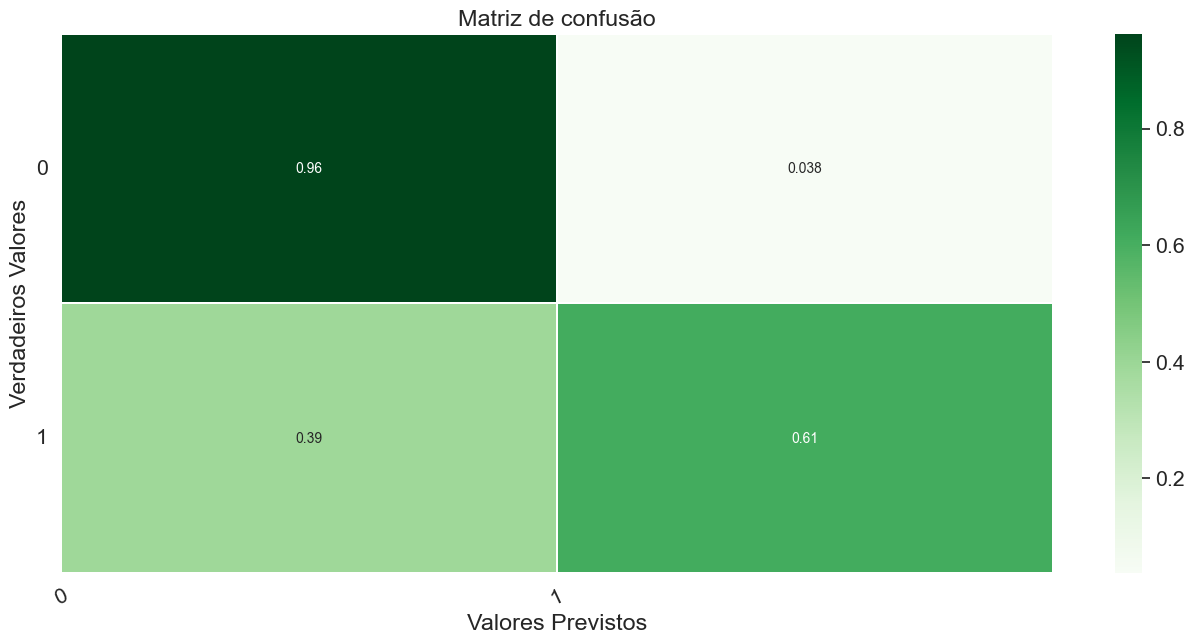

In [12]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_teste, previsao)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Valores Previstos')
plt.ylabel('Verdadeiros Valores')
plt.title('Matriz de confusão')
plt.show()

In [13]:
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       186
           1       0.82      0.61      0.70        54

    accuracy                           0.88       240
   macro avg       0.86      0.79      0.81       240
weighted avg       0.88      0.88      0.88       240



In [14]:
auc_roc = roc_auc_score(y_teste, previsao)
print(f"AUC: {auc_roc}")

AUC: 0.7867383512544803


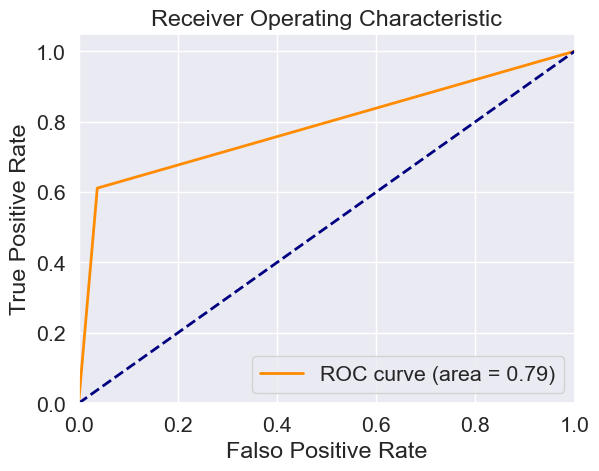

In [15]:
fpr, tpr, thresholds = roc_curve(y_teste, previsao)

# Calcular a área sob a curva ROC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

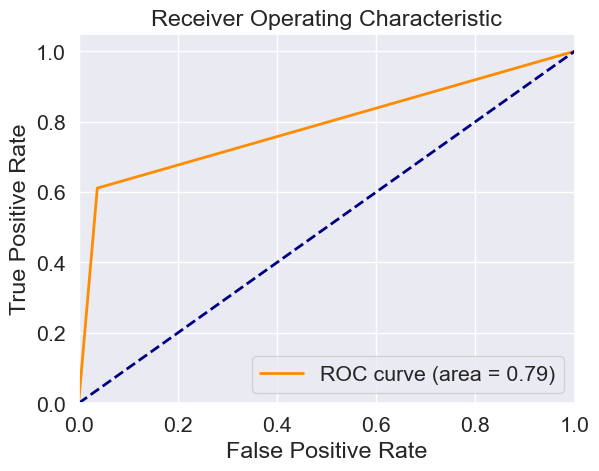

In [16]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()